
<h1 style='color:skyblue'>Facial Expression Recognition & Emotion Detection using Convolutional Neural Networks</h1>

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

2024-02-04 17:13:03.807206: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 17:13:03.807304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 17:13:03.961708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

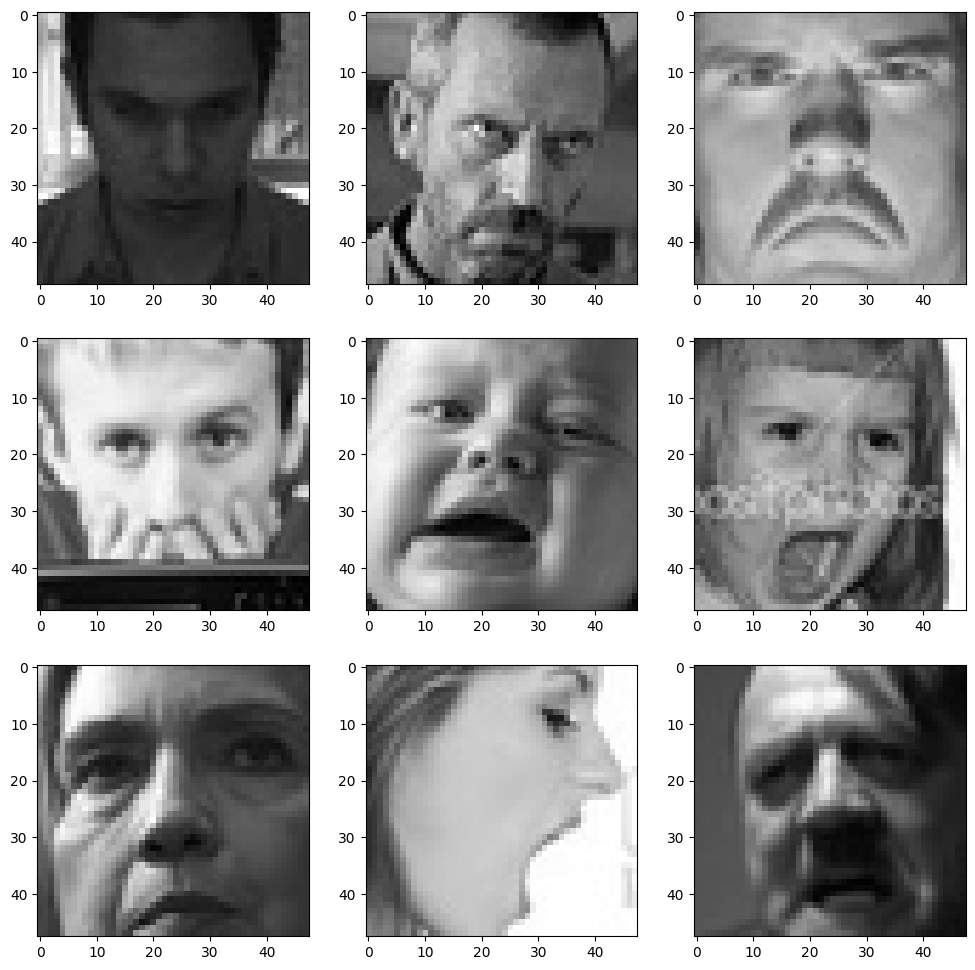

In [3]:
expression = 'angry'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

 ### Curation of Training and Validation Datasets

In [4]:
batch_size  = 128

train_datagen  = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)



Found 28821 images belonging to 7 classes.


In [5]:
test_set = val_datagen.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 7066 images belonging to 7 classes.


### CNN Architecture 

#### Feature Extraction (CNN Layers)

In [6]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Add Global Average Pooling
model.add(GlobalAveragePooling2D())

#### Fully Connected Layers

In [7]:
#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

#### Optimization and Compilation

In [8]:
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

### Fitting the Model with Training and Validation Data 

In [13]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("kaggle/working/model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [14]:
history = model.fit(
    x=train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=test_set.n // test_set.batch_size,
    callbacks=callbacks_list
)


Epoch 1/48


2024-02-04 17:33:54.155042: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


225/225 [==============================] - 68s 286ms/step - loss: 1.0599 - accuracy: 0.5955 - val_loss: 1.1996 - val_accuracy: 0.5412 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 31s 139ms/step - loss: 1.0241 - accuracy: 0.6113 - val_loss: 1.2041 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 30s 131ms/step - loss: 0.9859 - accuracy: 0.6281 - val_loss: 1.2331 - val_accuracy: 0.5432 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 34s 149ms/step - loss: 0.9531 - accuracy: 0.6406 - val_loss: 1.1550 - val_accuracy: 0.5597 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 29s 130ms/step - loss: 0.9146 - accuracy: 0.6539 - val_loss: 1.4056 - val_accuracy: 0.4881 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 30s 134ms/step - loss: 0.8857 - accuracy: 0.6660 - val_loss: 1.0787 - val_accuracy: 0.5997 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 31s 136ms

### Plotting Accuracy & Loss

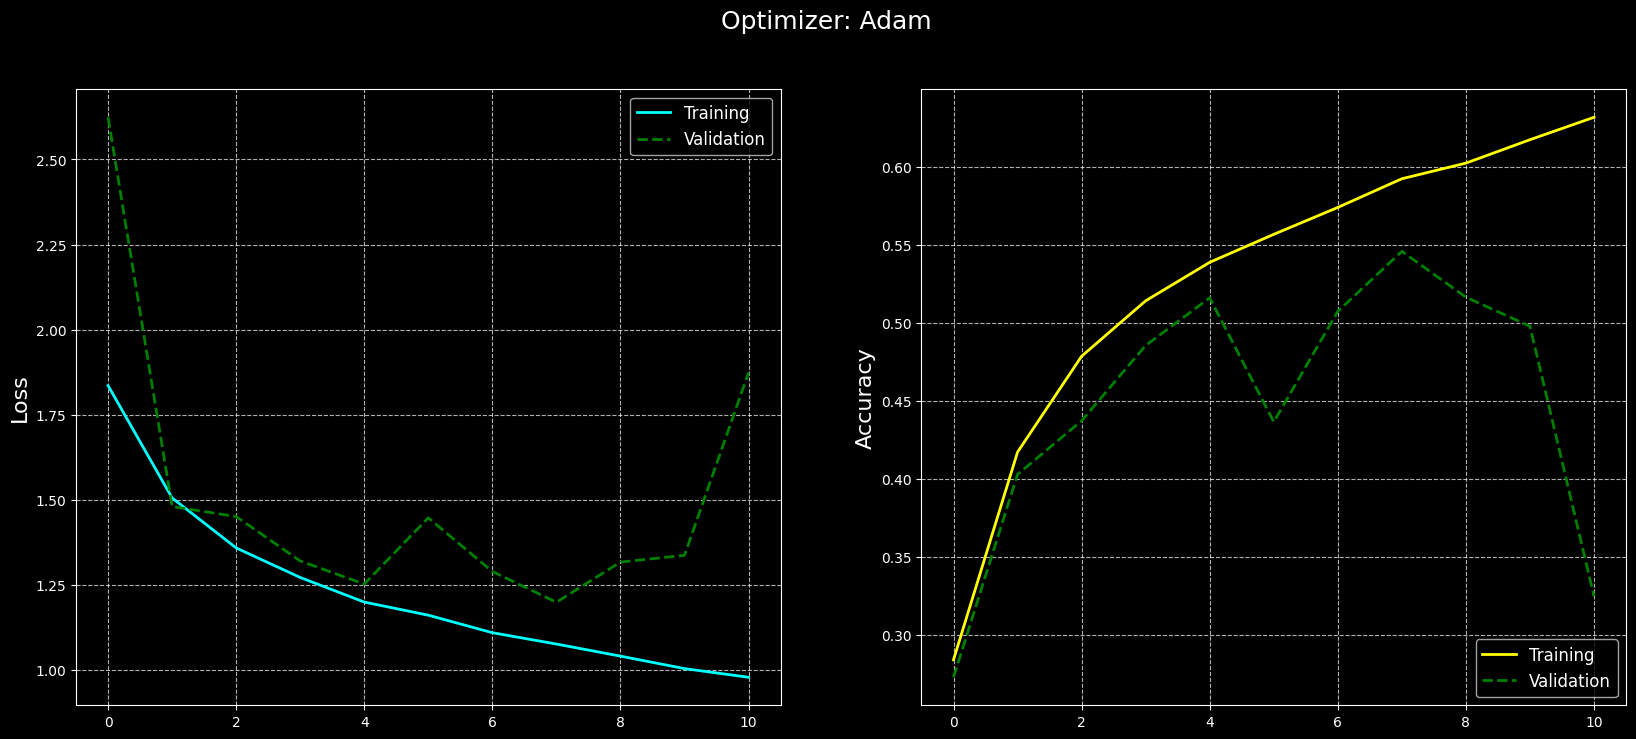

In [12]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(20, 8))


# Plotting Loss
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=18, color='white')
plt.ylabel('Loss', fontsize=16, color='white')
plt.plot(history.history['loss'], label='Training', linestyle='-', color='cyan', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linestyle='--', color='green', linewidth=2)
plt.legend(loc='upper right', fontsize='large')
plt.grid(True, linestyle='--', alpha=0.7)

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16, color='white')
plt.plot(history.history['accuracy'], label='Training', linestyle='-', color='yellow', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation', linestyle='--', color='green', linewidth=2)
plt.legend(loc='lower right', fontsize='large')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

